In [22]:
import gtfs2nx as gx

path = "./data/gtfs/gtfs_train.zip"

G = gx.transit_graph(
    path, time_window=("06:00", "08:00"), frac=0.1, walk_transfer_max_distance=0
)

2024-11-14 21:53:54,961 | INFO | STEP 1/5 - Loading GTFS feed(s) ...
2024-11-14 22:00:35,860 | INFO | STEP 2/5 - Preprocessing GTFS feeds ...


C:\Users\Gloria\PycharmProjects\reliable-travel-planning\venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Gloria\PycharmProjects\reliable-travel-planning\venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


2024-11-14 22:00:44,391 | INFO |            Filtering transit service between 06:00 and 08:00...
2024-11-14 22:00:44,533 | INFO | Removed 53 trips with contradictory stop sequence and departure times.
2024-11-14 22:00:44,655 | INFO | Removed 105 trips with unrealistic travel speeds (>108km/h).
2024-11-14 22:00:44,655 | INFO | STEP 3/5 - Determining service frequency, transfer waiting & travel times...
2024-11-14 22:00:44,765 | INFO |            Sampling 10.0% of all transit routes...
2024-11-14 22:00:44,765 | INFO | STEP 4/5 - Creating NetworkX graph...
2024-11-14 22:00:44,765 | INFO | STEP 5/5 - Adding edges for walk transfers between stops no more than 0 m apart (assuming walk speed of 4 km/h)...


KeyError: "None of [Index(['x', 'y'], dtype='object')] are in the [columns]"

In [19]:
G.nodes(data=True)

NodeDataView({'8501229@@000012.000023.002:72': {'y': 5130441.8167582825, 'x': 804099.3982158483, 'headway': 200.0, 'frequency': 1.0, 'route_id': '000012.000023.002:72', 'route_type': 2, 'route_short_name': 'R'}, '8501463:3@@000012.000023.002:72': {'y': 5129857.877772702, 'x': 804251.4966728222, 'headway': 0.0, 'frequency': 0.5, 'route_id': '000012.000023.002:72', 'route_type': 2, 'route_short_name': 'R'}, '8501229@@000015.000023.002:72': {'y': 5130441.8167582825, 'x': 804099.3982158483, 'headway': 200.0, 'frequency': 1.0, 'route_id': '000015.000023.002:72', 'route_type': 2, 'route_short_name': 'R'}, '8501463:2@@000015.000023.002:72': {'y': 5129857.877772702, 'x': 804251.4966728222, 'headway': 0.0, 'frequency': 0.5, 'route_id': '000015.000023.002:72', 'route_type': 2, 'route_short_name': 'R'}, '8501229@@000017.000023.002:72': {'y': 5130441.8167582825, 'x': 804099.3982158483, 'headway': 180.0, 'frequency': 1.0, 'route_id': '000017.000023.002:72', 'route_type': 2, 'route_short_name': 'R'}

In [20]:
G.edges(data=True)

OutEdgeDataView([('8501229@@000012.000023.002:72', '8501229@@000012.000023.002:72', {'weight': 0.0, 'mode': 'transit'}), ('8501229@@000012.000023.002:72', '8501463:3@@000012.000023.002:72', {'weight': 120.0, 'mode': 'transit'}), ('8501229@@000012.000023.002:72', '8501229@@000015.000023.002:72', {'weight': 100.0, 'mode': 'walk'}), ('8501229@@000012.000023.002:72', '8501229@@000017.000023.002:72', {'weight': 90.0, 'mode': 'walk'}), ('8501229@@000012.000023.002:72', '8501229@@000019.000023.002:72', {'weight': 140.0, 'mode': 'walk'}), ('8501463:3@@000012.000023.002:72', '8501229@@000012.000023.002:72', {'weight': 480.0, 'mode': 'transit'}), ('8501463:3@@000012.000023.002:72', '8501463:3@@000012.000023.002:72', {'weight': 0.0, 'mode': 'transit'}), ('8501463:3@@000012.000023.002:72', '8501463:2@@000015.000023.002:72', {'weight': 0.0, 'mode': 'walk'}), ('8501463:3@@000012.000023.002:72', '8501463:2@@000017.000023.002:72', {'weight': 0.0, 'mode': 'walk'}), ('8501463:3@@000012.000023.002:72', '

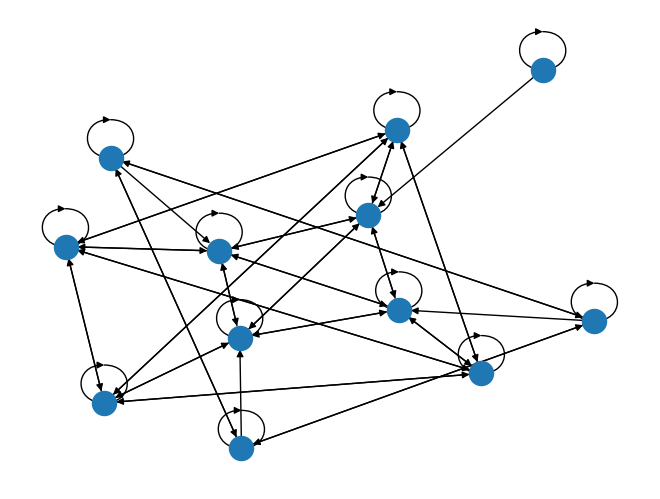

In [15]:
import networkx as nx

nx.draw(G)

In [17]:
selected_edges = [(u, v, d) for u, v, d in G.edges(data=True) if d["mode"] == "transit"]
selected_edges

[('8501229@@000012.000023.002:72',
  '8501229@@000012.000023.002:72',
  {'weight': 0.0, 'mode': 'transit'}),
 ('8501229@@000012.000023.002:72',
  '8501463:3@@000012.000023.002:72',
  {'weight': 120.0, 'mode': 'transit'}),
 ('8501463:3@@000012.000023.002:72',
  '8501229@@000012.000023.002:72',
  {'weight': 480.0, 'mode': 'transit'}),
 ('8501463:3@@000012.000023.002:72',
  '8501463:3@@000012.000023.002:72',
  {'weight': 0.0, 'mode': 'transit'}),
 ('8501229@@000015.000023.002:72',
  '8501229@@000015.000023.002:72',
  {'weight': 0.0, 'mode': 'transit'}),
 ('8501229@@000015.000023.002:72',
  '8501463:2@@000015.000023.002:72',
  {'weight': 120.0, 'mode': 'transit'}),
 ('8501463:2@@000015.000023.002:72',
  '8501229@@000015.000023.002:72',
  {'weight': 480.0, 'mode': 'transit'}),
 ('8501463:2@@000015.000023.002:72',
  '8501463:2@@000015.000023.002:72',
  {'weight': 0.0, 'mode': 'transit'}),
 ('8501229@@000017.000023.002:72',
  '8501229@@000017.000023.002:72',
  {'weight': 0.0, 'mode': 'transit

In [24]:
nodes_df = gx.utils.nodes_to_df(G)
nodes_df

,y,x,headway,frequency,route_id,route_type,route_short_name
8501229@@000012.000023.002:72,5.130442e+06,804099.398216,200.0,1.0,000012.000023.002:72,2,R
8501463:3@@000012.000023.002:72,5.129858e+06,804251.496673,0.0,0.5,000012.000023.002:72,2,R
8501229@@000015.000023.002:72,5.130442e+06,804099.398216,200.0,1.0,000015.000023.002:72,2,R
8501463:2@@000015.000023.002:72,5.129858e+06,804251.496673,0.0,0.5,000015.000023.002:72,2,R
8501229@@000017.000023.002:72,5.130442e+06,804099.398216,180.0,1.0,000017.000023.002:72,2,R
8501463:2@@000017.000023.002:72,5.129858e+06,804251.496673,0.0,0.5,000017.000023.002:72,2,R
8501229@@000019.000023.002:72,5.130442e+06,804099.398216,280.0,1.0,000019.000023.002:72,2,R
8501463:2@@000019.000023.002:72,5.129858e+06,804251.496673,0.0,0.5,000019.000023.002:72,2,R
8501457:1@@000015.000023.002:72,5.129585e+06,803743.553983,0.0,0.5,000015.000023.002:72,2,R
8501457:1@@000017.000023.002:72,5.129585e+06,803743.553983,0.0,0.5,000017.000023.002:72,2,R
